In [75]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)
# X : ndarray of shape (n_samples, 2)
#     The generated samples.

# y : ndarray of shape (n_samples,)
#     The integer labels (0 or 1) for class membership of each sample.

len(X), len(y)

(1000, 1000)

In [76]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samepls of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samepls of y: [1 1 1 1 0]


In [77]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


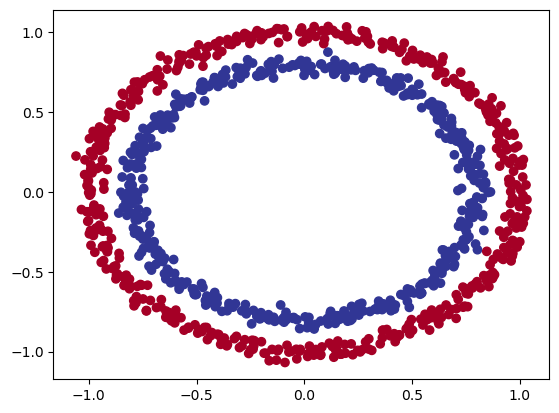

In [78]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.show()

Note: the data we're wrking with is often reffered to as a toy dataset, a dataset that is small enough to experiment on but still sizeable to learn the fundamentals



In [79]:
X.shape, y.shape

((1000, 2), (1000,))

In [80]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [81]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values of one sample for X: {X_sample} and same for y: {y_sample}")
print(f"For one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values of one sample for X: [0.75424625 0.23148074] and same for y: 1
For one sample of X: (2,) and the same for y: ()


In [82]:
### 1.2 Turn data into Tensors and create train and test splits

In [83]:
# Turn Data into Tensors
import torch
torch.__version__

'2.4.0'

In [84]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [85]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [86]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [87]:
torch.manual_seed(42)

In [88]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 0.2 = 20% of data will be test, 80% will be train

In [89]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:

1. Setup device agnostic code so our code will run on an accellerator - (GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [90]:
# import Pytorch nad nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, lets create a model that:

1. Subclass nn.Module (almost all models in PyTorch subclass nn.Module)
2. Create 2 'nn.linear()' layers that are capable of handline the shapes of our data
3. Define a forward method that outlines the forward pass (or forward computation of model)
4. Instantiate an instance of our model class and send it to the target device

In [91]:
# 1. Construct a model that subclasses nn.Module

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and upscales to 5 features [2 x 5]
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from prev layer and outputs 1 [5 x 1].
    # These layers have to match the matrix multi rules of inside numbers matching, with output being the same shape as y

  # 3. Define a forward method that outlines the forward pass (or forward computation of model)
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output : x goes into layer_1, layer_1's output goes into layer_2

# 4. Instantiate an isntance of our model class and send it to the target device
model_0 = CircleModelV1().to(device)
model_0


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [92]:
# Let's replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [93]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [94]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of preds: {len(untrained_preds)}, Shape of preds: {untrained_preds.shape}")
print(f"Length of test samples {len(X_test)}, Shape {X_test.shape}")
print(f"\nFirst 10 predictions: {torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: {y_test[:10]}")

Length of preds: 200, Shape of preds: torch.Size([200, 1])
Length of test samples 200, Shape torch.Size([200, 2])

First 10 predictions: tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [95]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss functin and optimizer

Which loss function or optimizer should you use?

This is problem specific.

For example, for regressions you might want MAE or MSE (mena absolute error or mean squared error)

For classification you many want binary cross entropy or cross entropy

As a reminder a loss function measures how wrong the models predictions are

And for optimizer 2 of the most common are SGD and Adam, however PyTorch has many built-in options

* for the loss function we're going to use `torch.nn.BECWithLogitsLoss()` BCE = BinaryCross entropy,

In [96]:
# Setup the loss function
# loss_fn = nn.BCELOSS() # BCELOSS = requires inputs to have gone through simoid activation function prior to input to BCELoss like the below code
# nn.sequential(
#     nn.Sigmoid()
#     nn.BCELoss()
# )

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in, so no need to use the above code first, also is more numerically stable

# Setup the optimizer (SGD(params={model_params}, lr={learning_rate_step}))
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [97]:
# Calculate accuracy - out of 100 examples what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100 # accuracy function
  return acc


## 3. Train model

To train our model, we're going need to build a training loop

1. Forward Pass
2. Calculate the loss
3. Optimzer zero grad
4. Loss backward (back propogation)
5. Optmizer Step (gradient descent)

### 3.1 Going from raw logits t-> prediction probabilities -> prediction labels

Our model outputs going to be raw **logits**.
**Raw Logits** -> Output of our mode,

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary crossentropy and softmax for multiclas classification).

Then we can convert our models prediction probabilities to **prediction labels** by either rounding them or taking argmax()

In [98]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits




tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [99]:
y_test[:5] # We need the logits to match the same format as the y_test. Instead of a float, we want 0s and 1s

tensor([1., 0., 1., 0., 1.])

In [100]:
# Use the sigmord activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs # They look the same as before(y_Logits) but **importantly**, they have been through the sigmoid activiation function

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [101]:
torch.round(y_pred_probs) # Round (now they are in the same format!) We can't call the round on the raw logits, we have to do the sigmoid function first

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, y=1 (class 1)
* `y_pred_probs` < 0.5, y=0 (class 0)

We could also adjust the cutoff boundary. ie `y_pred_probs` >= 0.7, y=1 but generally they are split at 0.5

In [102]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs) # y_pred_probs is prediction probabilities

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze())) # use squeeze to get rid of extra dimension

y_preds.squeeze() # prediction labels

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [103]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

# 3.2 Builing a training and test loop

In [104]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train() # Put model in training mode

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze() # squeeze removes the extra dimension
  y_pred = torch.round(torch.sigmoid(y_logits)) # Converts logit -> prediction probs -> Pred Labels


  # 2. Calculate the loss
  # BCELoss example: (Not used as much, use BCEWithLogitsLoss)
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilities as input

  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss() needs raw logits passed as input
                 y_train)

  # 3. Calculate the accuracy w/ Custom acc function we created
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #4. Optimzer zero grad
  optimizer.zero_grad()

  # 5. Loss backward (back propogation)
  loss.backward()

  # 6. Optmizer Step (gradient descent)
  optimizer.step()


  ### Testing
  model_0.eval() # Put model in eval mode

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)) # For binary classification of pred probabilities

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, # Loss function expects logits as input
                        y_test)

    # 3. Calculate the accuracy
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69796, Acc: 51.88% | Test Loss: 0.69460, Test Acc: 57.50%
Epoch: 10 | Loss: 0.69768, Acc: 52.00% | Test Loss: 0.69438, Test Acc: 58.00%
Epoch: 20 | Loss: 0.69742, Acc: 52.00% | Test Loss: 0.69418, Test Acc: 57.50%
Epoch: 30 | Loss: 0.69717, Acc: 52.00% | Test Loss: 0.69401, Test Acc: 56.50%
Epoch: 40 | Loss: 0.69695, Acc: 51.62% | Test Loss: 0.69385, Test Acc: 56.50%
Epoch: 50 | Loss: 0.69675, Acc: 51.38% | Test Loss: 0.69370, Test Acc: 56.00%
Epoch: 60 | Loss: 0.69656, Acc: 51.38% | Test Loss: 0.69357, Test Acc: 56.00%
Epoch: 70 | Loss: 0.69638, Acc: 51.38% | Test Loss: 0.69345, Test Acc: 56.50%
Epoch: 80 | Loss: 0.69621, Acc: 51.25% | Test Loss: 0.69334, Test Acc: 56.50%
Epoch: 90 | Loss: 0.69606, Acc: 51.38% | Test Loss: 0.69324, Test Acc: 55.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything

So to inspect it lets make some predicitons and make them visual

In other words: "Visualize, visualize, visualize"

To do so, we're going to import a function called `plot_decision_boundary()`

In [105]:
import requests
from pathlib import Path

# Download helpfunction from pytorch repo if it's not already downloaded
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



helper_functions.py already exists, skipping download


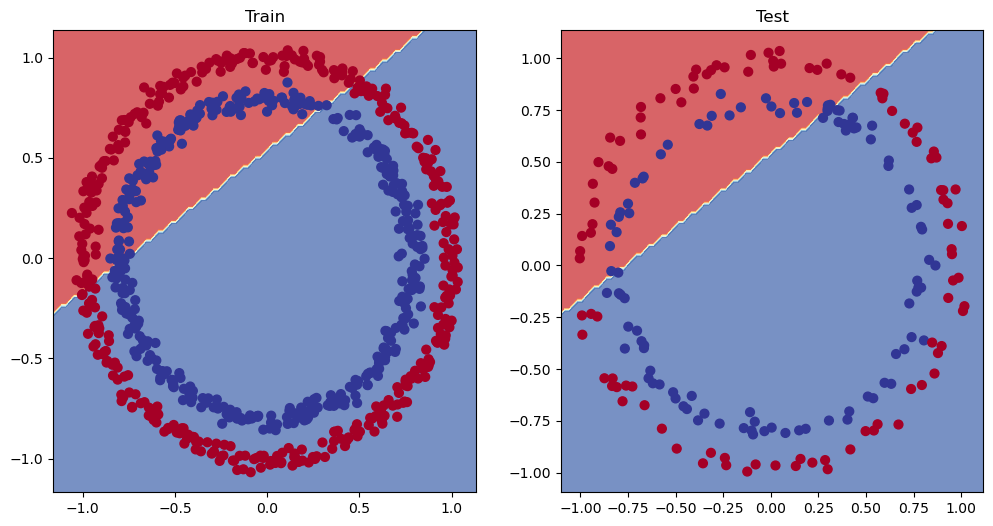

In [106]:
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# Improving a model (from a model perspective)

* Add more layers - give the model more cahnces to learn about patterns in the data
* Add more hidden units - ie. go from 5 hidden units to 10 hidden units (more params, potentially the better accuracy)
* Fit for longer, ie. adding more Epochs
* Changing the activation function (using Sigmoid at the moment)
* Change the learning rate (lr=0.02), might need to increase/decrease
* Change the loss function

These options are all from a model's perspective because they deal with the model, and **not** the data

And because these options are all values we (as machine learning engineers and data scientists) can change, they are reffered to as **hyperparameters**

Let's try and imprive our model by
* Adding more hidden units 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of Epochs: 100 -> 1000

Generally you would want to only make one of the changes at a time and track the results (experiment tracking) that way you know which change makes the improvement/degradation.

In [107]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [108]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
      # One way to layer functions
      # z = self.layer_1(x)
      # z = self.layer_2(z)
      # z = self.layer_3(z)
      # return z
      # Another, better, way to layer functions
    return self.layer_3(self.layer_2(self.layer_1(x))) # This way of writing operations leverages speedups where possible behind the scenes


model_1 = CircleModelV2().to(device)
model_1


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [109]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

# Setup the optimizer (SGD(params={model_params}, lr={learning_rate_step}))
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

# Write a traning and testing loop for modelV2
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer this time
epochs = 1000

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Calling sigmoid on logits -> pred probabilities -> Pprediction labels

  # 2. Calculate Loss and Accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  # 3. Optimzer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (back propogation)
  loss.backward()

  # 5. Optmizer Step (gradient descent)
  optimizer.step()

  # Testing
  model_1.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)) # For binary classification of pred probabilities

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, # Loss function expects logits as input
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                          y_pred=test_pred)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.69261, Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test Loss: 0.69379, Test Acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test Loss: 0.69437, Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test Loss: 0.69458, Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69465, Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69467, Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%


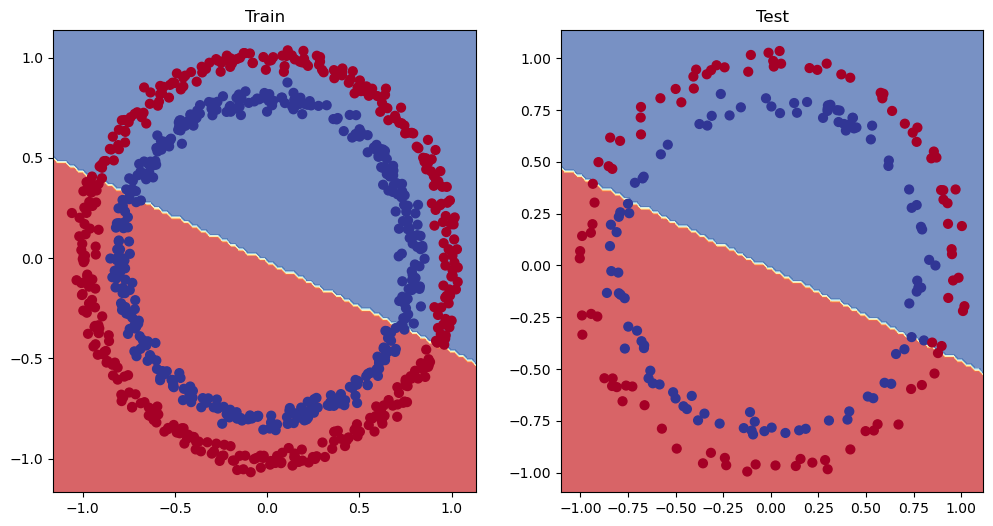

In [110]:
# Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

# 5.1 Preparing our data to see if our model can fit a straight line

One way to see if our model works is to test it on a smaller problem

In [111]:
# Create some data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

# CReate data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula

# check the data
print(len(X_regression))
print(X_regression[:5], y_regression[:5])


# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data will be training data
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

print(len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression))



100
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]]) tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280]])
80 80 20 20


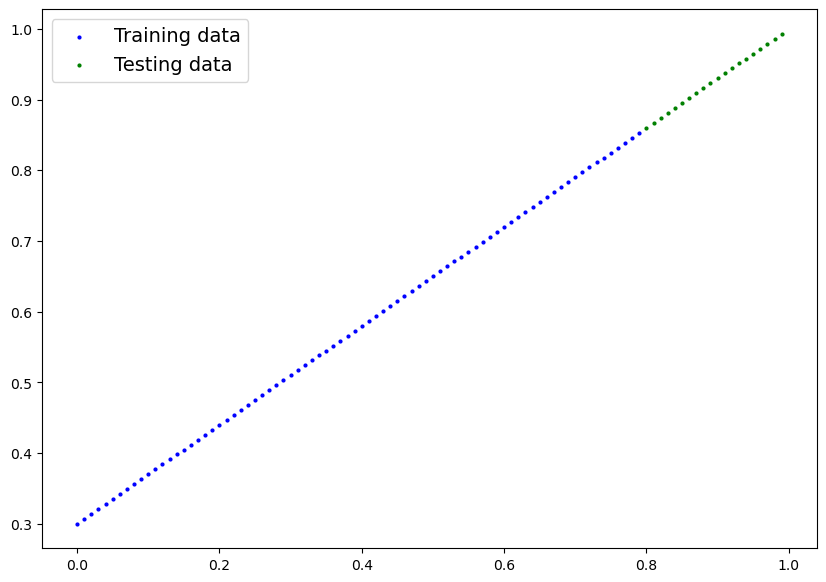

In [112]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

# Adjusting 'model_1' to fit a straight line

In [113]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [114]:
# Loss and optimzer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [115]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of Epochs
epochs = 1000

# Put the data on target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


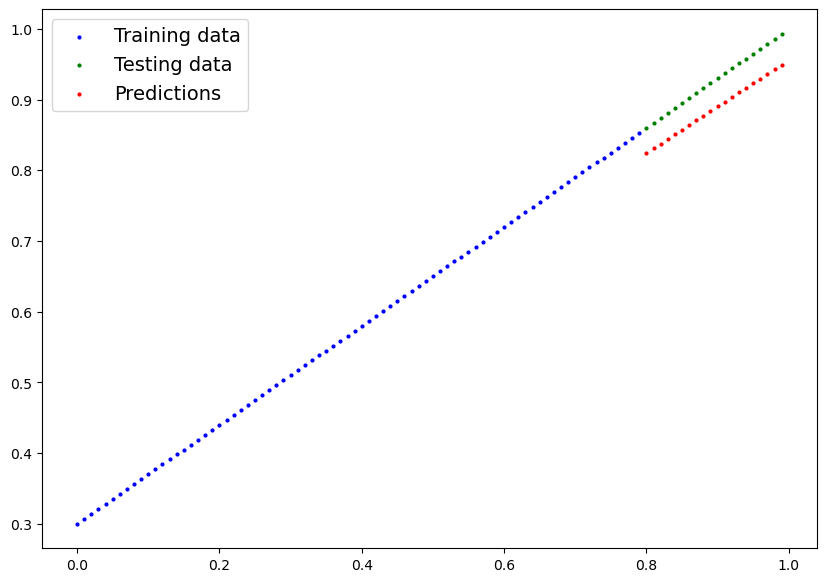

In [116]:
# Turn on evaluation mode
model_2.eval()

# Make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=test_pred.cpu())

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions

### 6.1 Recreating non-linear data (Red and Blue Circles)

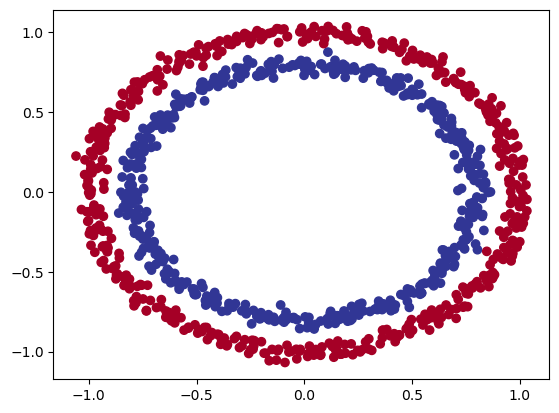

In [117]:
# Make plot and data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples =  1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [118]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity
- Linear = straight lines
- Non-linear = non-straight lines

Artificial neural networks are a large combination of linear and non-linear functions which are potentially able to find patterns in data

In [119]:
# Build a model with non-linear acitivation functions
from torch import nn
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # Basically turns the negative values to 0 and keeps the positives
        
        
    def forward(self, x):
        # Where should we put our non-linear activation function
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
        
model_3 = CircleModelV3()
model_3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [120]:
model_3.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [121]:
# Setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [122]:
# Training a model with non-linearity

# Random Seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data on device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)


# Loop through data
epochs = 1000

for epoch in range(epochs):
    ### Training
    model_3.train()
    
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> pred labels

    # 2. Calc the loss
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    #optimizer zero grad
    optimizer.zero_grad()
    
    # Backpropagation
    loss.backward()
    
    # Step the optimizer
    optimizer.step()
    
    ### Testing
    model_3.eval()
    
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, 
                               y_pred=test_pred)

    # print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929 | Acc: 50.00% | Test loss: 0.6932 | Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912 | Acc: 52.88% | Test loss: 0.6910 | Test Acc: 52.50%
Epoch: 200 | Loss: 0.6898 | Acc: 53.37% | Test loss: 0.6894 | Test Acc: 55.00%
Epoch: 300 | Loss: 0.6879 | Acc: 53.00% | Test loss: 0.6872 | Test Acc: 56.00%
Epoch: 400 | Loss: 0.6852 | Acc: 52.75% | Test loss: 0.6841 | Test Acc: 56.50%
Epoch: 500 | Loss: 0.6810 | Acc: 52.75% | Test loss: 0.6794 | Test Acc: 56.50%
Epoch: 600 | Loss: 0.6751 | Acc: 54.50% | Test loss: 0.6729 | Test Acc: 56.00%
Epoch: 700 | Loss: 0.6666 | Acc: 58.38% | Test loss: 0.6632 | Test Acc: 59.00%
Epoch: 800 | Loss: 0.6516 | Acc: 64.00% | Test loss: 0.6476 | Test Acc: 67.50%
Epoch: 900 | Loss: 0.6236 | Acc: 74.00% | Test loss: 0.6215 | Test Acc: 79.00%


In [123]:
### 6.4 Evaluating a model trained with non-linear activation functions

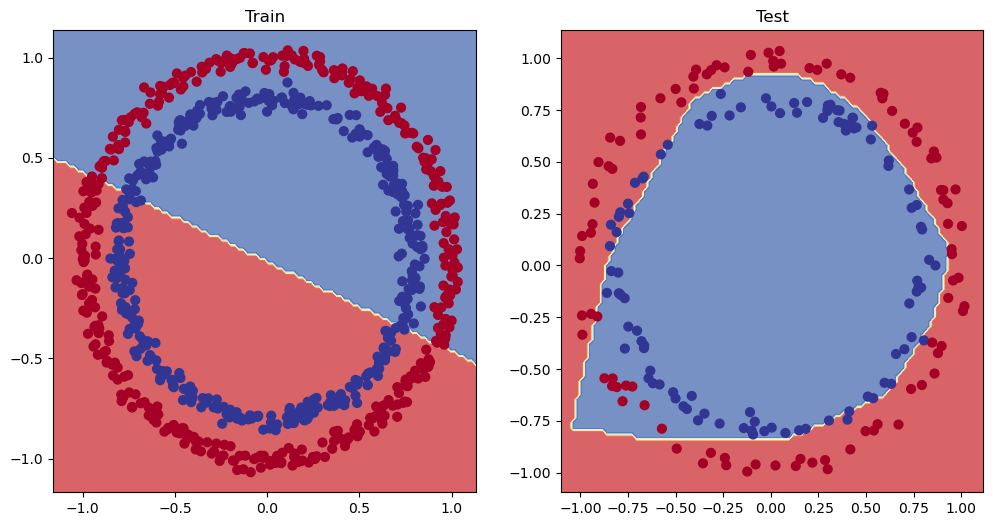

In [124]:
# Make predictions
model_3.eval()

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:5], y_test[:5]

# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = linear

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = non-linearity

Can you improve model_3 to do better than 80% on the test data?

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover the patterns in data and it tries to figure out teh pattern on its own

These tools are linear and non-linear functions

In [125]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

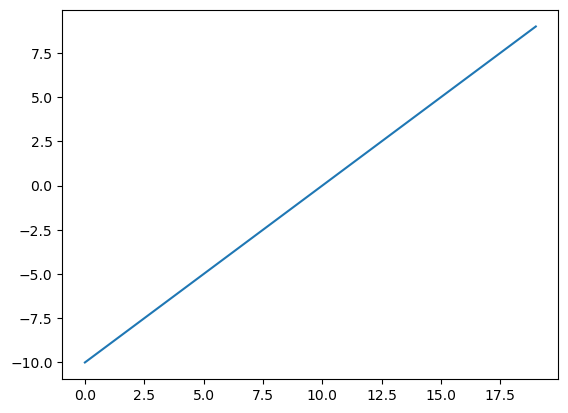

In [126]:
# Visualize this data

plt.plot(A)

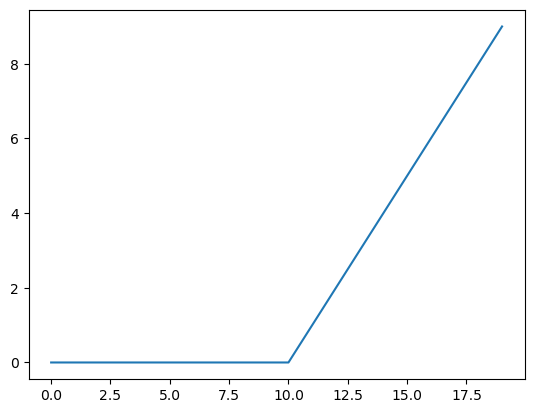

In [127]:
plt.plot(torch.relu(A))

In [128]:
def relu(x: torch.tensor) -> torch.tensor:
    return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A) # Recall that the relu activation takes the maximum between 0 and the input. So all negative numbers become '0' since 0 > any negative number

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

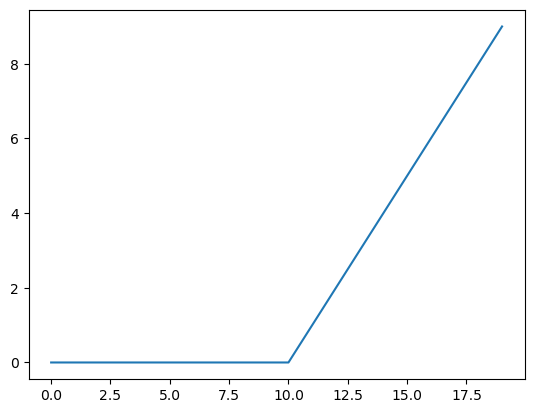

In [129]:
# Plot ReLU activation function
plt.plot(relu(A))

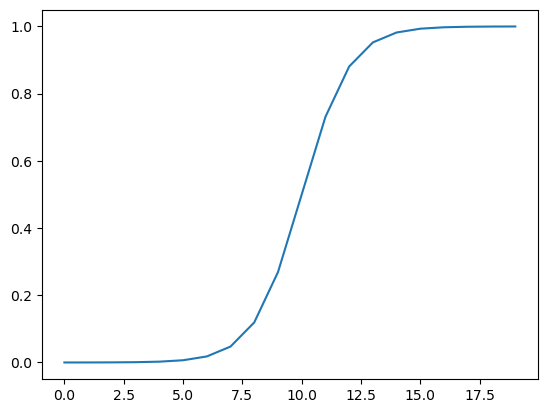

In [130]:
# Now lets do the same for sigmoid
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

plt.plot(torch.sigmoid(A))

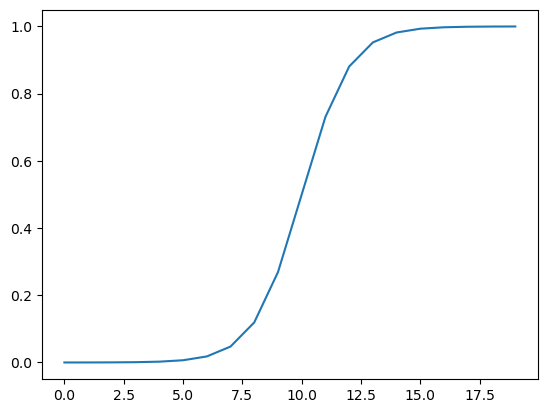

In [131]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog)
* Multiclass classificatin = multiple things ie. (cat vs. dog. vs. chicken)

- We use `Softmax` instead of `Sigmoid` for multiclass models
- We use Crossentropy (`torch.nn.CrossEntropyLoss`) instead of Binary Crossentropy (`torch.nn.BCELoss`)

### 8.1 Creating a toy multi-class datasets

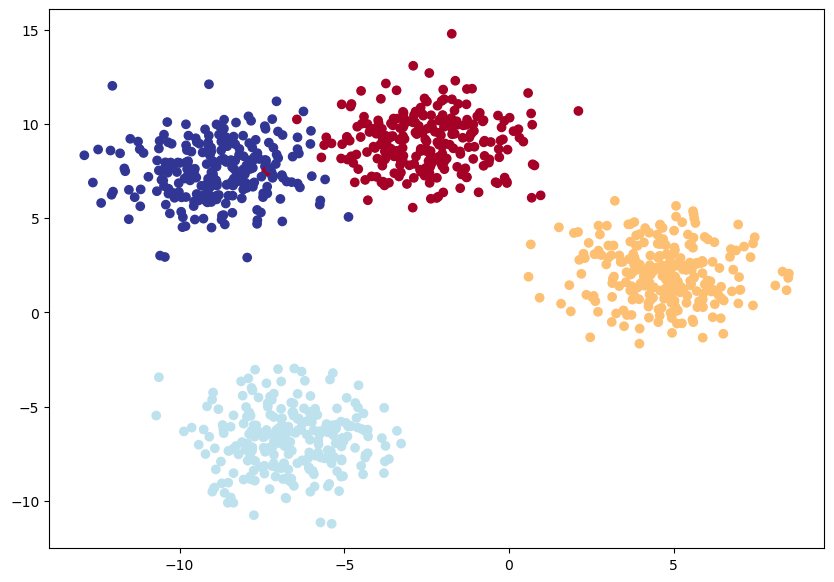

In [162]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # Give the clusters more randomness
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into training and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, 
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)




### 8.2 Building a multi-class classification model in pytorch



In [163]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [164]:
# Build a multiclass classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-class classification model
        
        Args:
            input_features (int): number of input features
            output_features (int): number of output features (number of output classes)
            hidden_units (int): number of hidden units, default 8
        """
        super().__init__()
        self.linear_later_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )
        
    def forward(self, x):
        return self.linear_later_stack(x)
        
# Create an instance of blob model and send it to target device
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4
        


BlobModel(
  (linear_later_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [165]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [166]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and optimizer for multiclass optimization model

In [167]:
# Create a loss function for multiclass classificaiton - measures how wrong our models predictions are
loss_fn = nn.CrossEntropyLoss()

# Create optimizer for multi-class classification - optmizer updates our model to try and reduce the loss 
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)



### 8.4 Getting prediction probabilities for a multi-class pytorch modal

- In order to evaluate and train and test our model, we need to convert out model's outputs (logits) to prediction probabilities and then to prediction labels
- Logits (raw output) -> Prediction Probabilities (use `torch.softmax`) -> Prediction Labels (take the argmax of the prediction probabilities)

In [168]:
# Let's get some raw output of our model (logits)
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits[:5]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')

In [169]:
y_blob_test[:10] # we need to get the y_preds into the same format as y_blob_test (predictions need to match test format)

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [170]:
# Convert our model's logits output to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In the tensor below, each element in the inner array tells us the models prediction of which class the data falls into

```        
       |class0| |class1||class2||class3|
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')
```

In [171]:
torch.sum(y_pred_probs[0]) # Each element now sums up to 1, and all negatives are removed due to `softmax`

tensor(1., device='cuda:0')

In [172]:
print(torch.max(y_pred_probs[0])) # Since this is the max in this array, the model thinks the class with this value is where the data belongs
print(torch.argmax(y_pred_probs[0])) # Argsmax returns the index of where the max value is located, so the model thinks this item belongs in "Class 1" with a "0.3244" probability

tensor(0.3244, device='cuda:0')
tensor(1, device='cuda:0')


In [173]:
# Convert our models prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10] # The predictions are now the same format as the test data

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

In [174]:
### 8.5 Creating a training loop and testing loop for a multiclass pytorch model

In [177]:
# Fit the multi-class model to the data

# Random Seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data on device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Set number of epochs
epochs = 100

# Loop through data

for epoch in range(epochs):
    ### Training
    model_4.train()
    
    # 1. Forward pass
    y_logits = model_4(X_blob_train)
    test_preds = torch.softmax(y_logits, dim=1).argmax(dim=1) # logits -> prediction probabilities -> pred labels

    # 2. Calc the loss
    loss = loss_fn(y_logits, y_blob_train) # CrossEntropyLoss (takes in logits as first input, training data as second)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=test_preds)
    
    #optimizer zero grad
    optimizer.zero_grad()
    
    # Backpropagation
    loss.backward()
    
    # Step the optimizer
    optimizer.step()
    
    ### Testing
    model_4.eval()
    
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, 
                               y_pred=test_pred)

    # print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.0331 | Acc: 99.25% | Test loss: 0.0243 | Test Acc: 99.50%
Epoch: 10 | Loss: 0.0316 | Acc: 99.25% | Test loss: 0.0226 | Test Acc: 99.50%
Epoch: 20 | Loss: 0.0304 | Acc: 99.25% | Test loss: 0.0213 | Test Acc: 99.50%
Epoch: 30 | Loss: 0.0296 | Acc: 99.25% | Test loss: 0.0202 | Test Acc: 99.50%
Epoch: 40 | Loss: 0.0289 | Acc: 99.25% | Test loss: 0.0194 | Test Acc: 99.50%
Epoch: 50 | Loss: 0.0283 | Acc: 99.25% | Test loss: 0.0187 | Test Acc: 99.50%
Epoch: 60 | Loss: 0.0279 | Acc: 99.25% | Test loss: 0.0182 | Test Acc: 99.50%
Epoch: 70 | Loss: 0.0275 | Acc: 99.25% | Test loss: 0.0177 | Test Acc: 99.50%
Epoch: 80 | Loss: 0.0271 | Acc: 99.25% | Test loss: 0.0172 | Test Acc: 99.50%
Epoch: 90 | Loss: 0.0268 | Acc: 99.25% | Test loss: 0.0169 | Test Acc: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [178]:
# Make predictions
model_4.eval()

with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    
# View the first 10 predictions
y_logits[:10]

tensor([[ -0.8251,   7.4214,  -8.6492,  -9.6438],
        [ -2.4384,  -7.2530,  -4.4771,   4.0202],
        [ -4.1931,  -4.6251,   3.9723,  -3.1864],
        [ -1.4889,   5.2914,  -4.4613,  -5.5503],
        [  4.8179,  -1.4412, -10.3127,  -7.9953],
        [ -3.1214,  -8.6418,  -5.1784,   4.7837],
        [ -3.7127,  -3.9668,   3.4995,  -2.6344],
        [  4.2985,  -4.6856,  -7.8447,  -4.0603],
        [ -5.3360,  -5.9068,   4.8426,  -4.0999],
        [  4.4805,  -3.4720,  -8.5458,  -5.3922]], device='cuda:0')

In [180]:
# go from logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.6209e-04, 9.9974e-01, 1.0483e-07, 3.8776e-08],
        [1.5643e-03, 1.2687e-05, 2.0366e-04, 9.9822e-01],
        [2.8397e-04, 1.8436e-04, 9.9875e-01, 7.7710e-04],
        [1.1346e-03, 9.9879e-01, 5.8071e-05, 1.9543e-05],
        [9.9809e-01, 1.9093e-03, 2.6793e-07, 2.7195e-06],
        [3.6871e-04, 1.4764e-06, 4.7133e-05, 9.9958e-01],
        [7.3492e-04, 5.7005e-04, 9.9653e-01, 2.1605e-03],
        [9.9963e-01, 1.2535e-04, 5.3225e-06, 2.3425e-04],
        [3.7967e-05, 2.1454e-05, 9.9981e-01, 1.3069e-04],
        [9.9959e-01, 3.5163e-04, 2.2008e-06, 5.1539e-05]], device='cuda:0')

In [182]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [183]:
y_blob_test[:10] # It seems like the model's predictions are the same as our test data! Woohoo!

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

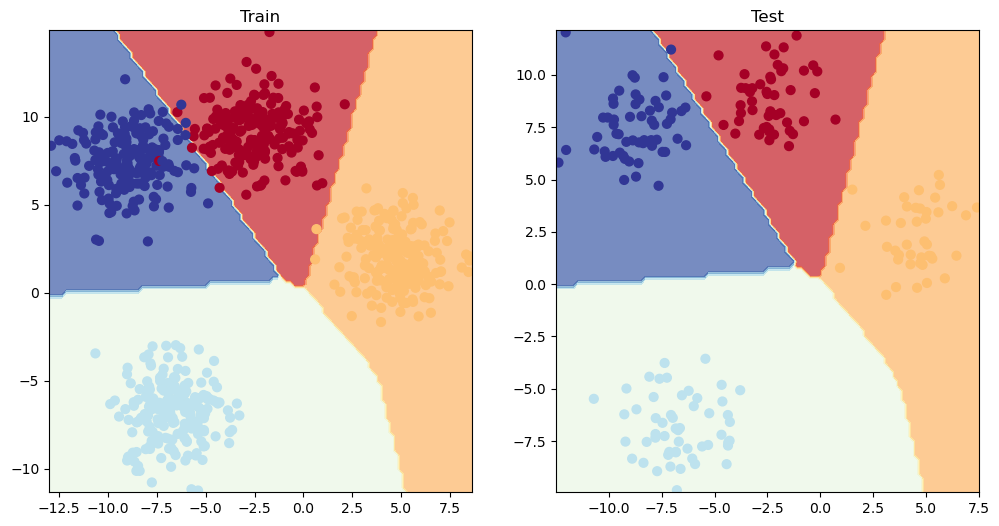

In [184]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 9. A few more classification metrics (to evaluate our classification model)

* Accuracy - out of 100 samples, how many do our model get right
* Precision
* Recall
* F1-score - combines precision and recall
* Confusion matrix
* Classification report